# SALES DATA EXPLORATION

Link 1 : https://www.hackerearth.com/practice/machine-learning/linear-regression/multivariate-linear-regression-1/tutorial/



## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Прочитане на данни за времето

In [2]:
sales_header = ['prod_1','prod_2','prod_3','prod_4','prod_5']

In [3]:
sales_data = pd.read_csv('data/retail/Y.csv',header = None, names = sales_header)
sales_data.head()

,prod_1,prod_2,prod_3,prod_4,prod_5
0,332.2570,17.0173,15,10,18.4464
1,325.6933,9.0652,15,0,16.4136
2,310.4057,12.0085,12,43,21.3264
3,392.5802,18.0622,15,8,16.3666
4,273.3940,15.0945,2,7,18.4099


## Проверка за липсващи стойности (NaN-s) (няма такива)

In [4]:
pd.isnull(sales_data).any()

prod_1    False
prod_2    False
prod_3    False
prod_4    False
prod_5    False
dtype: bool

## Статистическа информация
STD - стандартно отклонение
MEAN - средна стойност

In [5]:
sales_data.describe()

,prod_1,prod_2,prod_3,prod_4,prod_5
count,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000
mean,292.521125,9.539978,14.739450,8.213761,23.201540
std,59.973164,3.464587,12.328605,14.502563,7.543058
min,124.741800,0.887000,0.000000,0.000000,9.480400
25%,251.109700,6.997550,4.000000,0.000000,18.411200
50%,286.852200,9.084550,13.000000,0.000000,22.282300
75%,327.868350,11.953050,23.000000,11.000000,26.330750
max,495.593200,22.063500,65.000000,93.000000,67.418100


## Графики

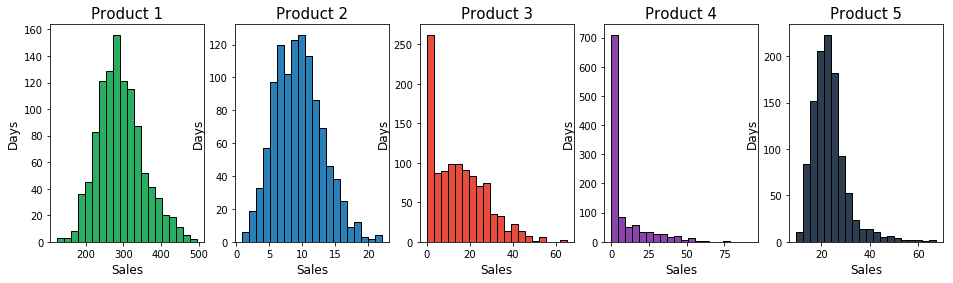

In [6]:
plt.figure(figsize=(16,4))

plt.subplot(1, 5, 1)
plt.hist(sales_data['prod_1'], bins = 20, ec='black', color='#27ae60')
# ec - edge color, more visibility between bins
# bins - number of bins
plt.title('Product 1',fontsize=15)
plt.xlabel('Sales',fontsize=12)
plt.ylabel('Days',fontsize=12)

plt.subplot(1, 5, 2)

plt.hist(sales_data['prod_2'], bins = 20, ec='black', color='#2980b9')
# ec - edge color, more visibility between bins
# bins - number of bins
plt.title('Product 2',fontsize=15)
plt.xlabel('Sales',fontsize=12)
plt.ylabel('Days',fontsize=12)

plt.subplot(1, 5, 3)

plt.hist(sales_data['prod_3'], bins = 20, ec='black', color='#e74c3c')
# ec - edge color, more visibility between bins
# bins - number of bins
plt.title('Product 3',fontsize=15)
plt.xlabel('Sales',fontsize=12)
plt.ylabel('Days',fontsize=12)

plt.subplot(1, 5, 4)
plt.hist(sales_data['prod_4'], bins = 20, ec='black', color='#8e44ad')
# ec - edge color, more visibility between bins
# bins - number of bins
plt.title('Product 4',fontsize=15)
plt.xlabel('Sales',fontsize=12)
plt.ylabel('Days',fontsize=12)

plt.subplot(1, 5, 5)

plt.hist(sales_data['prod_5'], bins = 20, ec='black', color='#2c3e50')
# ec - edge color, more visibility between bins
# bins - number of bins
plt.title('Product 5',fontsize=15)
plt.xlabel('Sales',fontsize=12)
plt.ylabel('Days',fontsize=12)

plt.show()

## Plots Over Time

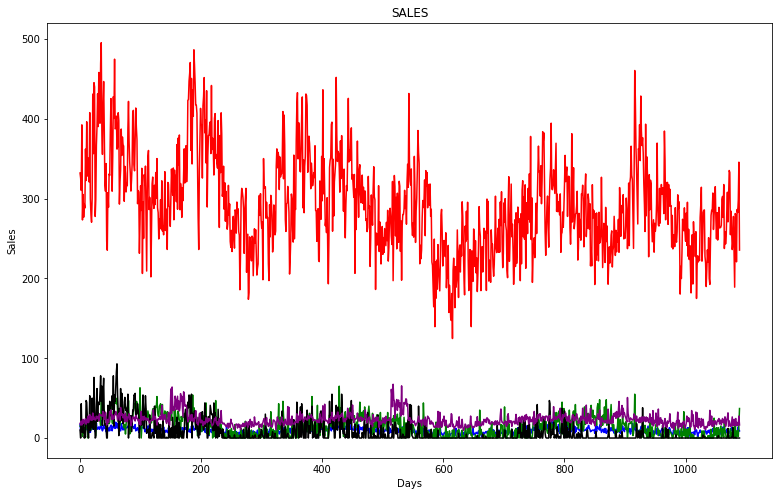

In [7]:
plt.figure(figsize=(13,8))

plt.plot(sales_data['prod_1'],color = 'red')
plt.plot(sales_data['prod_2'],color = 'blue')
plt.plot(sales_data['prod_3'],color = 'green')
plt.plot(sales_data['prod_4'],color = 'black')
plt.plot(sales_data['prod_5'],color = 'purple')

plt.title('SALES')
plt.xlabel('Days',fontsize = 10)
plt.ylabel('Sales',fontsize = 10)

plt.show()

## Корелационна Матрица

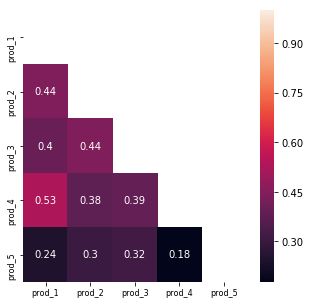

In [8]:
mask = np.zeros_like(sales_data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

plt.figure(figsize=(5,5))
sns.heatmap(data = sales_data.corr(), mask = mask, annot = True)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

# Корелации
### Положителни, но слаби корелации. "Най-силна" корелация между продукт 4 и продукт 1 : +0.53 . В модела трябва да участват всички колони (продукти).

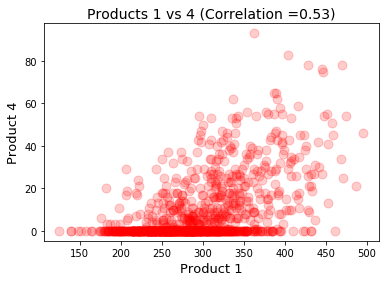

In [9]:
one_four_corr = round(sales_data['prod_1'].corr(sales_data['prod_4']),2)

plt.scatter(x=sales_data['prod_1'],y=sales_data['prod_4'],alpha=0.2, s=80, color='red')
plt.title(f'Products 1 vs 4 (Correlation ={one_four_corr})',fontsize=14)
plt.xlabel("Product 1",fontsize=13)
plt.ylabel("Product 4",fontsize=13)
plt.show()

# Корелация между продажби и време

### Прочитане информация за време

In [10]:
short_weather_header = ['maxtempC','mintempC','tempC','windspdKmph',
  'humidity','cloudcover','feelslikeC','workday']
weather_data = pd.read_csv('data/retail/U_short.csv',header = None, names = short_weather_header)
weather_data.head()

,maxtempC,mintempC,tempC,windspdKmph,humidity,cloudcover,feelslikeC,workday
0,14,2,12,15,59,41,13,1
1,6,0,7,16,53,27,3,1
2,10,0,11,14,43,14,10,1
3,15,0,15,10,40,29,15,1
4,14,1,13,13,53,28,13,1


### Корелация Продажби / Температура

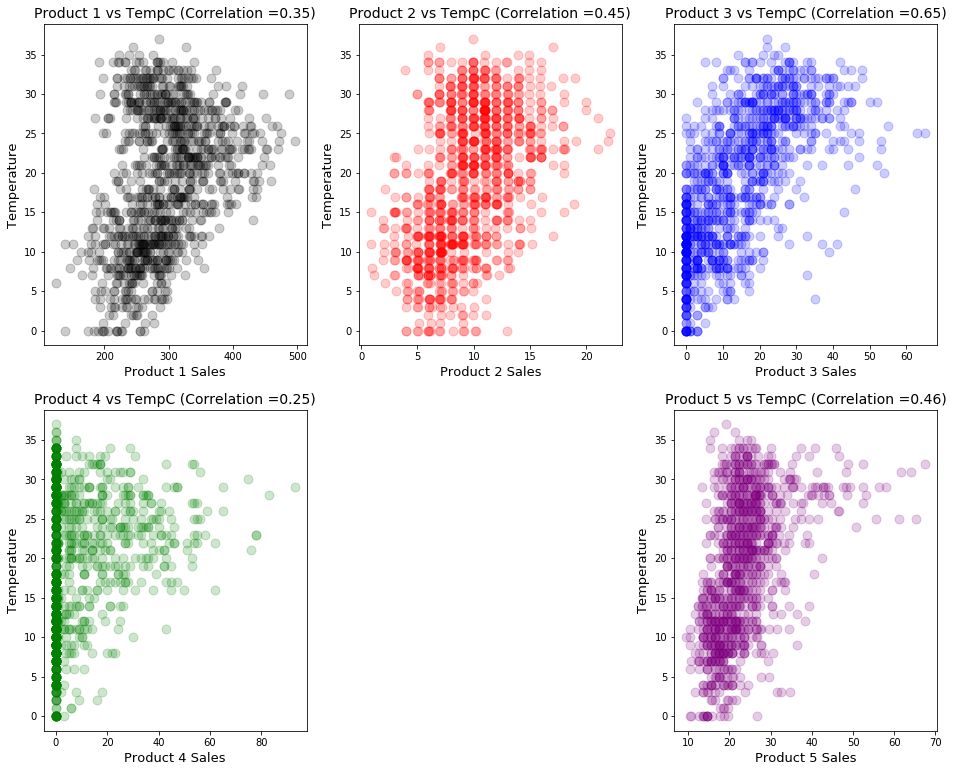

In [11]:
plt.figure(figsize=(16,13))

plt.subplot(2,3,1)
sales_temp_corr = round(sales_data['prod_1'].corr(weather_data['tempC']),2)
plt.scatter(x=sales_data['prod_1'],y=weather_data['tempC'],alpha=0.2, s=80, color='black')
plt.title(f'Product 1 vs TempC (Correlation ={sales_temp_corr})',fontsize=14)
plt.xlabel("Product 1 Sales",fontsize=13)
plt.ylabel("Temperature",fontsize=13)

plt.subplot(2,3,2)
sales_temp_corr = round(sales_data['prod_2'].corr(weather_data['tempC']),2)
plt.scatter(x=sales_data['prod_2'],y=weather_data['tempC'],alpha=0.2, s=80, color='red')
plt.title(f'Product 2 vs TempC (Correlation ={sales_temp_corr})',fontsize=14)
plt.xlabel("Product 2 Sales",fontsize=13)
plt.ylabel("Temperature",fontsize=13)

plt.subplot(2,3,3)
sales_temp_corr = round(sales_data['prod_3'].corr(weather_data['tempC']),2)
plt.scatter(x=sales_data['prod_3'],y=weather_data['tempC'],alpha=0.2, s=80, color='blue')
plt.title(f'Product 3 vs TempC (Correlation ={sales_temp_corr})',fontsize=14)
plt.xlabel("Product 3 Sales",fontsize=13)
plt.ylabel("Temperature",fontsize=13)

plt.subplot(2,3,4)
sales_temp_corr = round(sales_data['prod_4'].corr(weather_data['tempC']),2)
plt.scatter(x=sales_data['prod_4'],y=weather_data['tempC'],alpha=0.2, s=80, color='green')
plt.title(f'Product 4 vs TempC (Correlation ={sales_temp_corr})',fontsize=14)
plt.xlabel("Product 4 Sales",fontsize=13)
plt.ylabel("Temperature",fontsize=13)

plt.subplot(2,3,6)
sales_temp_corr = round(sales_data['prod_5'].corr(weather_data['tempC']),2)
plt.scatter(x=sales_data['prod_5'],y=weather_data['tempC'],alpha=0.2, s=80, color='purple')
plt.title(f'Product 5 vs TempC (Correlation ={sales_temp_corr})',fontsize=14)
plt.xlabel("Product 5 Sales",fontsize=13)
plt.ylabel("Temperature",fontsize=13)

plt.show()

## Слаба корелация между температура и продажби (най-силна за продукт 3)

### Корелация Продажби / Облачност

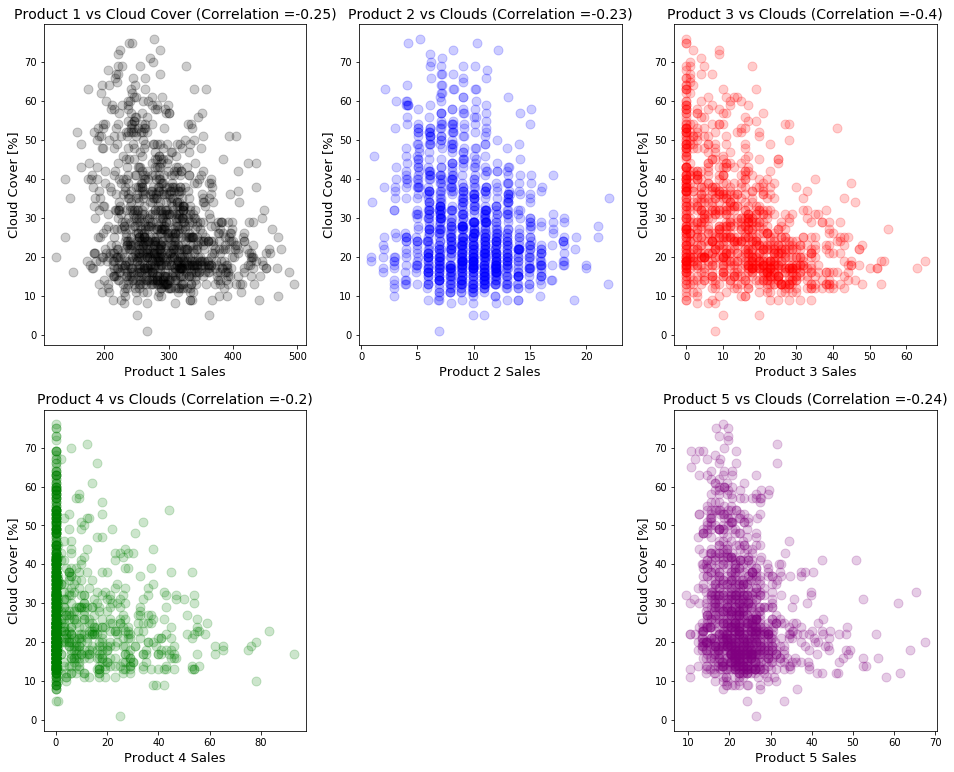

In [12]:
plt.figure(figsize=(16,13))

plt.subplot(2,3,1)
sales_cloudcover_corr = round(sales_data['prod_1'].corr(weather_data['cloudcover']),2)
plt.scatter(x=sales_data['prod_1'],y=weather_data['cloudcover'],alpha=0.2, s=80, color='black')
plt.title(f'Product 1 vs Cloud Cover (Correlation ={sales_cloudcover_corr})',fontsize=14)
plt.xlabel("Product 1 Sales",fontsize=13)
plt.ylabel("Cloud Cover [%]",fontsize=13)

plt.subplot(2,3,2)
sales_cloudcover_corr = round(sales_data['prod_2'].corr(weather_data['cloudcover']),2)
plt.scatter(x=sales_data['prod_2'],y=weather_data['cloudcover'],alpha=0.2, s=80, color='blue')
plt.title(f'Product 2 vs Clouds (Correlation ={sales_cloudcover_corr})',fontsize=14)
plt.xlabel("Product 2 Sales",fontsize=13)
plt.ylabel("Cloud Cover [%]",fontsize=13)

plt.subplot(2,3,3)
sales_cloudcover_corr = round(sales_data['prod_3'].corr(weather_data['cloudcover']),2)
plt.scatter(x=sales_data['prod_3'],y=weather_data['cloudcover'],alpha=0.2, s=80, color='red')
plt.title(f'Product 3 vs Clouds (Correlation ={sales_cloudcover_corr})',fontsize=14)
plt.xlabel("Product 3 Sales",fontsize=13)
plt.ylabel("Cloud Cover [%]",fontsize=13)

plt.subplot(2,3,4)
sales_cloudcover_corr = round(sales_data['prod_4'].corr(weather_data['cloudcover']),2)
plt.scatter(x=sales_data['prod_4'],y=weather_data['cloudcover'],alpha=0.2, s=80, color='green')
plt.title(f'Product 4 vs Clouds (Correlation ={sales_cloudcover_corr})',fontsize=14)
plt.xlabel("Product 4 Sales",fontsize=13)
plt.ylabel("Cloud Cover [%]",fontsize=13)

plt.subplot(2,3,6)
sales_cloudcover_corr = round(sales_data['prod_5'].corr(weather_data['cloudcover']),2)
plt.scatter(x=sales_data['prod_5'],y=weather_data['cloudcover'],alpha=0.2, s=80, color='purple')
plt.title(f'Product 5 vs Clouds (Correlation ={sales_cloudcover_corr})',fontsize=14)
plt.xlabel("Product 5 Sales",fontsize=13)
plt.ylabel("Cloud Cover [%]",fontsize=13)

plt.show()

## Слаба отрицателна корелация между облачност и продажби

# Анализ на броят работни / почивни дни

In [13]:
num_weekend = 0
num_workday = 0
num_holiday = 0
num_worksat = 0


for i in range(0,1090):
    if weather_data['workday'][i] == 0:
        num_weekend += 1
    if weather_data['workday'][i] == 1:
        num_workday += 1
    if weather_data['workday'][i] == 2:
        num_worksat += 1
    if weather_data['workday'][i] == 3:
        num_holiday += 1

        
sales_weekend = 0
sales_workday = 0
sales_holiday = 0
sales_worksat = 0

for i in range(0,1090):
    if weather_data['workday'][i] == 0:
        sales_weekend += sales_data['prod_1'][i] 
    if weather_data['workday'][i] == 1:
        sales_workday += sales_data['prod_1'][i]   
    if weather_data['workday'][i] == 2:
        sales_worksat += sales_data['prod_1'][i] 
    if weather_data['workday'][i] == 3:
        sales_holiday += sales_data['prod_1'][i]     
            
print("TYPE\t\tCOUNT\tSALES\t\tAVG SALES/DAY")
print("weekend\t\t",num_weekend,"\t",round(sales_weekend,2),"\t",round(sales_weekend/num_weekend,2))
print("workday\t\t",num_workday,"\t",round(sales_workday,2),"\t",round(sales_workday/num_workday,2))
print("holiday\t\t",num_holiday,"\t",round(sales_holiday,2),"\t",round(sales_holiday/num_holiday,2))
print("worksat\t\t",num_worksat,"\t",round(sales_worksat,2),"\t",round(sales_worksat/num_worksat,2))

TYPE		COUNT	SALES		AVG SALES/DAY
weekend		 287 	 81640.87 	 284.46
workday		 731 	 215765.08 	 295.16
holiday		 46 	 13371.38 	 290.68
worksat		 26 	 8070.7 	 310.41


## Създаване на нов DataFrame с такава информация 
(начинът на създаване може да се подобри)

In [14]:
data = []
data.append(['weekend',num_weekend,round(sales_weekend,2)])
sales_stats = pd.DataFrame(data, columns=['TYPE','DAYS','S_1'])

row = ['workday',num_workday,round(sales_workday,2)]
sales_stats.loc[len(sales_stats)] = row

row = ['holiday',num_holiday,round(sales_holiday,2)]
sales_stats.loc[len(sales_stats)] = row

row = ['worksat',num_worksat,round(sales_worksat,2)]
sales_stats.loc[len(sales_stats)] = row

sales_stats['AVG_1'] = round(sales_stats['S_1'] / sales_stats['DAYS'],2)
sales_stats

sales_stats

,TYPE,DAYS,S_1,AVG_1
0,weekend,287,81640.87,284.46
1,workday,731,215765.08,295.16
2,holiday,46,13371.38,290.68
3,worksat,26,8070.70,310.41


In [15]:
sales_weekend = 0
sales_workday = 0
sales_holiday = 0
sales_worksat = 0

for i in range(0,1090):
    if weather_data['workday'][i] == 0:
        sales_weekend += sales_data['prod_2'][i] 
    if weather_data['workday'][i] == 1:
        sales_workday += sales_data['prod_2'][i]   
    if weather_data['workday'][i] == 2:
        sales_worksat += sales_data['prod_2'][i] 
    if weather_data['workday'][i] == 3:
        sales_holiday += sales_data['prod_2'][i]  

sales_stats['S_2'] = [round(sales_weekend,2),round(sales_workday,2),round(sales_holiday,2),round(sales_worksat,2)]
sales_stats['AVG_2'] = round(sales_stats['S_2'] / sales_stats['DAYS'],2)
sales_stats

,TYPE,DAYS,S_1,AVG_1,S_2,AVG_2
0,weekend,287,81640.87,284.46,2743.07,9.56
1,workday,731,215765.08,295.16,6970.74,9.54
2,holiday,46,13371.38,290.68,442.99,9.63
3,worksat,26,8070.70,310.41,241.77,9.30


In [16]:
sales_weekend = 0
sales_workday = 0
sales_holiday = 0
sales_worksat = 0

for i in range(0,1090):
    if weather_data['workday'][i] == 0:
        sales_weekend += sales_data['prod_3'][i] 
    if weather_data['workday'][i] == 1:
        sales_workday += sales_data['prod_3'][i]   
    if weather_data['workday'][i] == 2:
        sales_worksat += sales_data['prod_3'][i] 
    if weather_data['workday'][i] == 3:
        sales_holiday += sales_data['prod_3'][i]  

sales_stats['S_3'] = [round(sales_weekend,2),round(sales_workday,2),round(sales_holiday,2),round(sales_worksat,2)]
sales_stats['AVG_3'] = round(sales_stats['S_3'] / sales_stats['DAYS'],2)


sales_weekend = 0
sales_workday = 0
sales_holiday = 0
sales_worksat = 0

for i in range(0,1090):
    if weather_data['workday'][i] == 0:
        sales_weekend += sales_data['prod_4'][i] 
    if weather_data['workday'][i] == 1:
        sales_workday += sales_data['prod_4'][i]   
    if weather_data['workday'][i] == 2:
        sales_worksat += sales_data['prod_4'][i] 
    if weather_data['workday'][i] == 3:
        sales_holiday += sales_data['prod_4'][i]  

sales_stats['S_4'] = [round(sales_weekend,2),round(sales_workday,2),round(sales_holiday,2),round(sales_worksat,2)]
sales_stats['AVG_4'] = round(sales_stats['S_4'] / sales_stats['DAYS'],2)

sales_weekend = 0
sales_workday = 0
sales_holiday = 0
sales_worksat = 0

for i in range(0,1090):
    if weather_data['workday'][i] == 0:
        sales_weekend += sales_data['prod_5'][i] 
    if weather_data['workday'][i] == 1:
        sales_workday += sales_data['prod_5'][i]   
    if weather_data['workday'][i] == 2:
        sales_worksat += sales_data['prod_5'][i] 
    if weather_data['workday'][i] == 3:
        sales_holiday += sales_data['prod_5'][i]  

sales_stats['S_5'] = [round(sales_weekend,2),round(sales_workday,2),round(sales_holiday,2),round(sales_worksat,2)]
sales_stats['AVG_5'] = round(sales_stats['S_5'] / sales_stats['DAYS'],2)
sales_stats

,TYPE,DAYS,S_1,AVG_1,S_2,AVG_2,S_3,AVG_3,S_4,AVG_4,S_5,AVG_5
0,weekend,287,81640.87,284.46,2743.07,9.56,3854,13.43,2827,9.85,6707.80,23.37
1,workday,731,215765.08,295.16,6970.74,9.54,11034,15.09,5398,7.38,16968.84,23.21
2,holiday,46,13371.38,290.68,442.99,9.63,719,15.63,434,9.43,1023.02,22.24
3,worksat,26,8070.70,310.41,241.77,9.30,459,17.65,294,11.31,590.02,22.69


## Разглеждане промяната в средния брой продажби на отделни продукти спрямо деня в който са продадени

### Трябва мащабиране, продукт 1 е намален 6 пъти за по-добра видимост

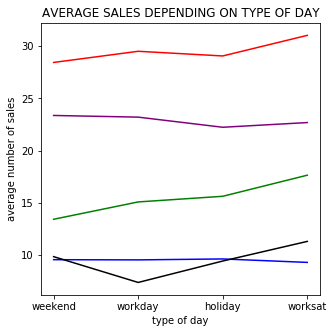

In [47]:
plt.figure(figsize=(5,5))
plt.plot(sales_stats['AVG_1']/10,color = 'red') # "scaling"
plt.plot(sales_stats['AVG_2'],color = 'blue')
plt.plot(sales_stats['AVG_3'],color = 'green')
plt.plot(sales_stats['AVG_4'],color = 'black')
plt.plot(sales_stats['AVG_5'],color = 'purple')
plt.xticks(np.arange(0, 4, step=1),labels = ['weekend','workday','holiday','worksat'])
plt.xlabel('type of day')
plt.ylabel('average number of sales')
plt.title('AVERAGE SALES DEPENDING ON TYPE OF DAY')
plt.show()

## Изводи (малки разлики в средните стойности, може изводите да не са значими):
- Продукт 4 се продава най-зле през седмицата
- Продукт 3 се продава най-зле през уикенда
- Продукт 5 се продава по-зле по време на празници
- Продукт 1 се продава по-често в работни съботи